In [1]:
### Import libraries ###
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Regression by least squares
It is common for data to be given as discrete values along a continuum. However, you may need to estimate a point between discrete values. Also, you may need the simplified version of a complicated function.  One way to do this is to compute values of the function in a discrete number of values in the range of interest. Then we get a simpler function for adjust these values. These two steps are known as curve fitting.

## 1.- Linear Regression:
The simplest example of a least squares approximation is fitting a line to a set of observations defined by points: $ (x_1,y_1),(x_2,y_2),...,(x_n,y_n)$ to the mathematical expression for a stright line:  
$$y=a_0+a_1x+e$$
where $e$ is the error or difference of the model with rispect to the observations: $ e = y-a_o-a_1x $
<br>
If we trying to get the best curve we need to obtain the smallest summ of errors:

$$ \sum_{i=1}^ne_i =  \sum_{i=1}^n(y_i -a_o-a_1x_i) $$

where $n$ is the total number of data points

keep in mind that this is not the only way of computing the error, we can use differnet computations, depending on our needs, for example:

$$ \sum_{i=1}^n|e_i| =  \sum_{i=1}^n|y_i -a_o-a_1x_i| $$

Using the absolute value is good when you want to ignore outliers

$$ \sum_{i=1}^ne_i^2 =  \sum_{i=1}^n(y_i -a_o-a_1x_i)^2 $$

Using the squared error is good when you want to get the smallest error

**Proof: Linear regression by least squares:**
$$ Sr =\sum_{i=1}^ne_i^2 =  \sum_{i=1}^n(y_i -a_o-a_1x_i)^2 $$

From our optimization class we know that a max or minumum point of a function is found when the derrivative is equal to 0, therefore:

$\;\;\;\;\;\;\;\;\;\;\;$ 
$\frac{\partial Sr}{\partial a_o}= -2 \sum_{i=1}^n(y_i -a_o-a_1x_i) =0 $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$\frac{\partial Sr}{\partial a_1} = -2\sum_{i=1}^n(y_i -a_o-a_1x_i)x_i = 0 $

Divide by -2:

$\;\;\;\;\;\;\;\;\;\;\;$
$ \sum_{i=1}^n(y_i -a_o-a_1x_i) =0 $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$ \sum_{i=1}^n(y_i -a_o-a_1x_i)x_i = 0 $

Obtain all summations

$\;\;\;\;\;\;\;\;\;\;\;$
$ \sum_{i=1}^ny_i -\sum_{i=1}^na_o-\sum_{i=1}^na_1x_i =0 $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$ \sum_{i=1}^ny_ix_i -\sum_{i=1}^na_ox_i-\sum_{i=1}^na_1x_i^2 = 0 $

Notice that  $ \sum_{i=1}^na_o=na_o $ 

$\;\;\;\;\;\;\;\;\;\;\;$
$ \sum_{i=1}^ny_i -na_o-\sum_{i=1}^na_1x_i =0 $

Obtain the expression for $a_o$ and $a_1$

$\;\;\;\;\;\;\;\;\;\;\;$
$ a_o = \frac{\sum_{i=1}^ny_i}{n} -\frac{a_1\sum_{i=1}^nx_i}{n} $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$ a_1\sum_{i=1}^nx_i^2  = \sum_{i=1}^ny_ix_i -\sum_{i=1}^na_ox_i $


substituting $a_o$ in $a_1$ function:


$$ a_1\sum_{i=1}^nx_i^2  = \sum_{i=1}^ny_ix_i -\sum_{i=1}^n(\frac{\sum_{i=1}^ny_i}{n} -\frac{a_1\sum_{i=1}^nx_i}{n})x_i $$

Open the last multiplication: 

$$ a_1\sum_{i=1}^nx_i^2  = \sum_{i=1}^ny_ix_i -\sum_{i=1}^n\frac{\sum_{i=1}^ny_i}{n}x_i  +\sum_{i=1}^n\frac{a_1\sum_{i=1}^nx_i}{n}x_i$$


Grup $a_1$ together:
$$ a_1\sum_{i=1}^nx_i^2 - \sum_{i=1}^n\frac{a_1\sum_{i=1}^nx_i}{n}x_i  = \sum_{i=1}^ny_ix_i -\sum_{i=1}^n\frac{\sum_{i=1}^ny_i}{n}x_i  $$

Factor $a_1$:
$$ a_1(\sum_{i=1}^nx_i^2 - \sum_{i=1}^n\frac{\sum_{i=1}^nx_i}{n}x_i)  = \sum_{i=1}^ny_ix_i -\sum_{i=1}^n\frac{\sum_{i=1}^ny_i}{n}x_i  $$

Let $a_1$ alone:
$$ a_1  =\frac{ \sum_{i=1}^ny_ix_i -\sum_{i=1}^n\frac{\sum_{i=1}^ny_i}{n}x_i}{\sum_{i=1}^nx_i^2 - \sum_{i=1}^n\frac{\sum_{i=1}^nx_i}{n}x_i} $$

Rearange $x_i$:

$$ a_1  =\frac{ \sum_{i=1}^ny_ix_i -\sum_{i=1}^nx_i\frac{\sum_{i=1}^ny_i}{n}}{\sum_{i=1}^nx_i^2 - \sum_{i=1}^nx_i\frac{\sum_{i=1}^nx_i}{n}} $$

Multiply by $\frac{n}{n} $: 

$$ a_1  =\frac{ n\sum_{i=1}^ny_ix_i -\sum_{i=1}^nx_i{\sum_{i=1}^ny_i}}{n\sum_{i=1}^nx_i^2 - \sum_{i=1}^nx_i{\sum_{i=1}^nx_i}} $$

Simplify:

$$ a_1  =\frac{ n\sum_{i=1}^ny_ix_i -\sum_{i=1}^nx_i{\sum_{i=1}^ny_i}}{n\sum_{i=1}^nx_i^2 - (\sum_{i=1}^nx_i)^2} $$

Therefore:


$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$ a_o = \frac{\sum_{i=1}^ny_i}{n} -\frac{a_1\sum_{i=1}^nx_i}{n} $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
$ a_1  =\frac{ n\sum_{i=1}^ny_ix_i -\sum_{i=1}^nx_i{\sum_{i=1}^ny_i}}{n\sum_{i=1}^nx_i^2 - (\sum_{i=1}^nx_i)^2} $

In [34]:
def linear_regression_least_squares(x,y):
    n = len(x)
    if n != len(y): print("x and y must be vectors of same length")
    sum_x  = 0
    sum_y  = 0 
    sum_xy = 0
    sum_x2 = 0
    for i in range(0,n):
        sum_x +=  x[i]
        sum_y +=  y[i]
        sum_xy += y[i]*x[i]
        sum_x2 += x[i]*x[i]
    y_m = sum_y/n
    x_m = sum_x/n
    a1 = (n*sum_xy - sum_x*sum_y)/(n*sum_x2 - sum_x*sum_x)
    a0= y_m - a1*x_m
    
    ### Statitstics ###
    st = 0
    sr = 0
    for i in range(0,n):
        st += (y[i]-y_m)**2        # Standar deviation  of data
        sr += (y[i]-a1*x[i]-a0)**2 # standard deviation of prediction
        
    s_yx = (sr/(n-2))**0.5         # Standard Error
    r2   = (st-sr)/st              # R2 coefficient
    return a0,a1,s_yx,r2

R2:0.9824601991900052, Standar Error: 0.6380028362379109


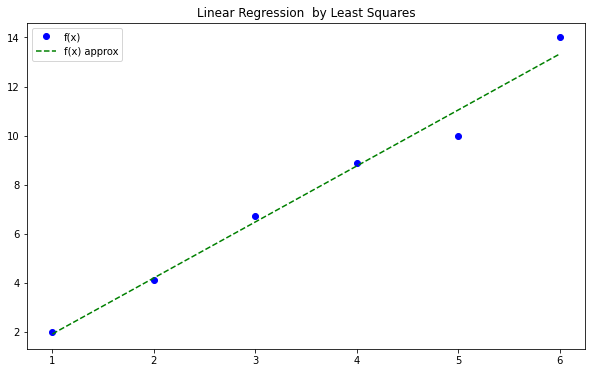

In [35]:
x = np.array([1,2,3,4,5,6])
y = np.array([2,4.1,6.7,8.9,10,14])
a0,a1,s_yx,r2=linear_regression_least_squares(x,y)
y_predict = a0 + a1*x

print(f"R2:{r2}, Standar Error: {s_yx}")
### Plot ###
plt.figure(figsize=(10,6))
plt.plot(x,y,"bo",label="f(x)")
plt.plot(x,y_predict,"g--",label="f(x) approx")

### Make Plot Pretty ###
plt.title("Linear Regression  by Least Squares")
plt.legend()
plt.show()

## 2.- Linearization of nonlinear relationships

Linear regression offers a powerful technique to fit a better line to the data. However, the fact that the relationship between the dependent variable and independent variable  is linear is not always the case. Does this mean that  if y and x do not share a linear relationship are we done? Aboslutly not, we can apply a trick:
<ol>
    <li> Obtain the data </li>
    <li> Lineraize it  </li>
    <li> Apply Linear Regression </li>
    <li> Transform back the data back to the unlinear relationship </li>
</ol>

**Example:**
<br>
Expontential model $y=\alpha_1 e^{\beta_1 x} $

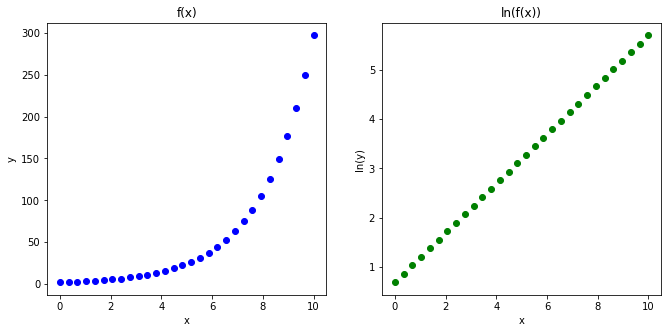

In [56]:
x=np.linspace(0,10,30) # x vector
y = 2*np.exp(0.5*x)    # y vector
y_l = np.log(y)        # y vector linearized

### Plot ###
fig,ax = plt.subplots(figsize=(11,5),ncols=2,nrows=1)
ax[0].plot(x,y,"bo",label="f(x)")
ax[0].set_title("f(x)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x,y_l,"go",label="ln(f(x))")
ax[1].set_title("ln(f(x))")
ax[1].set_xlabel("x")
ax[1].set_ylabel("ln(y)")
## Make Plot Pretty ###
plt.show()

Once The data is linearized we can apply linear regression

R2:1.0, Standar Error: 4.196248604251576e-16


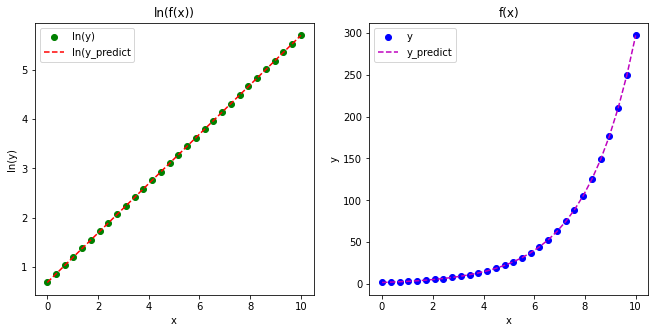

In [78]:
a0,a1,s_yx,r2=linear_regression_least_squares(x,y_l)
y_predict = a0 + a1*x
y_predict_un_linearized = np.exp(y_predict)
### Plot ###
fig,ax = plt.subplots(figsize=(11,5),ncols=2,nrows=1)

ax[0].plot(x,y_l,"go",label="ln(y)")
ax[0].plot(x,y_predict,"r--",label="ln(y_predict")
ax[0].set_title("ln(f(x))")
ax[0].set_xlabel("x")
ax[0].set_ylabel("ln(y)")
ax[0].legend()

ax[1].plot(x,y,"bo",label="y")
ax[1].plot(x,y_predict_un_linearized,"m--",label="y_predict")
ax[1].set_title("f(x)")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].legend()

## Make Plot Pretty ###
print(f"R2:{r2}, Standar Error: {s_yx}")

## 3.- Linear Regression in General:
In General we can write a function:
$$n=a_0+a_1x+a_2x^2 + ... + a_mx^m + e$$
as:
$$ Xa=y $$

where $ X = [1^T x^T x^{2T} ... x^{nT}]  \in R^{nxm}$ and $ y \in R^{nx1} $ , $n=$ Number of data points , $m=$ Degree of polynomial.

How to solve this?
$$ X^TXa=X^Ty $$
Therfore:
$$ a=(X^TX)^{-1}X^Ty $$

**Example:**
<br>
1) $y  = –0.859 + 1.032x $

In [160]:
# Lets generate the data points:
x = np.array([ 0,1,2,3])
y=  -0.859 + 1.032*x

## Lets form X and proepr y##
x0 = np.ones_like(x)
x1 = x
X = np.stack((x0,x1)).T
y1 = y.reshape(-1,1)
print(f"X shape:{X.shape}, y shape:{y1.shape}, \nX:\n{X}")

### Lets apply the formula ###
XTX_1 = np.linalg.inv(np.dot(X.T,X))
XTy = np.dot(X.T,y1)
a= np.dot(XTX_1,XTy)

### Extract coefcients, remeber that a is a nx1 vector ###
a0 = a[0,0]
a1 = a[1,0]
print(f"a0={a0}, a1={a1}")

X shape:(4, 2), y shape:(4, 1), 
X:
[[1 0]
 [1 1]
 [1 2]
 [1 3]]
a0=-0.8590000000000004, a1=1.0320000000000005


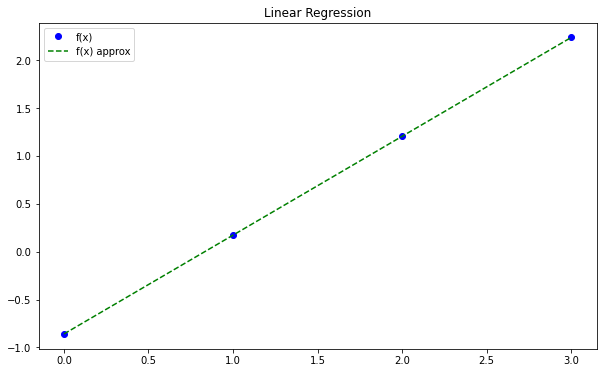

In [162]:
y_predict = a0 + a1*x
### Plot ###
plt.figure(figsize=(10,6))
plt.plot(x,y,"bo",label="f(x)")
plt.plot(x,y_predict,"g--",label="f(x) approx")

### Make Plot Pretty ###
plt.title("Linear Regression")
plt.legend()
plt.show()

2) $y  = –1 + 12.1x  + 0.8x^2 - 0.6x^3 + 2x^4$

In [167]:
# Lets generate the data points:
x = np.array([ 0,1,2,3,4,5,6,7,8,9])
y= -1 + 12.1*x  + 0.8*x**2 - 0.6*x**3 + 2*x**4   

## Lets form X and proepr y##
x0 = np.ones_like(x)
x1 = x
x2 = x**2
x3 = x**3
x4 = x**4

X = np.stack((x0,x1,x2,x3,x4)).T
y1 = y.reshape(-1,1)
print(f"X shape:{X.shape}, y shape:{y1.shape}, \nX:\n{X}")

### Lets apply the formula ###
XTX_1 = np.linalg.inv(np.dot(X.T,X))
XTy = np.dot(X.T,y1)
a= np.dot(XTX_1,XTy)

### Extract coefcients, remeber that a is a nx1 vector ###
a0 = a[0,0]
a1 = a[1,0]
a2 = a[2,0]
a3 = a[3,0]
a4 = a[4,0]

print(f"\n a0={round(a0,4)}, a1={round(a1,4)},a2={round(a2,4)},a3={round(a3,4)},a4={round(a4,4)}")

X shape:(10, 5), y shape:(10, 1), 
X:
[[   1    0    0    0    0]
 [   1    1    1    1    1]
 [   1    2    4    8   16]
 [   1    3    9   27   81]
 [   1    4   16   64  256]
 [   1    5   25  125  625]
 [   1    6   36  216 1296]
 [   1    7   49  343 2401]
 [   1    8   64  512 4096]
 [   1    9   81  729 6561]]

 a0=-1.0, a1=12.1,a2=0.8,a3=-0.6,a4=2.0


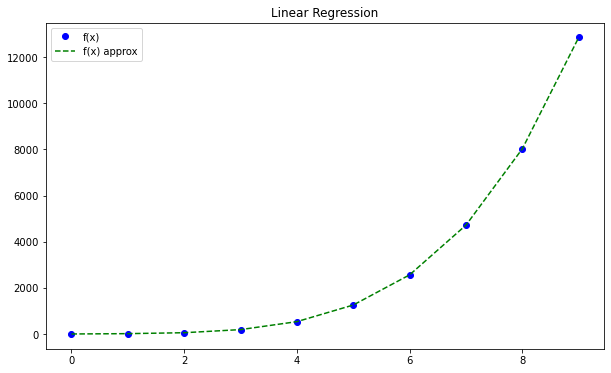

In [168]:
y_predict = a0 + a1*x +a2*x**2 + a3*x**3 + a4*x**4
### Plot ###
plt.figure(figsize=(10,6))
plt.plot(x,y,"bo",label="f(x)")
plt.plot(x,y_predict,"g--",label="f(x) approx")

### Make Plot Pretty ###
plt.title("Linear Regression")
plt.legend()
plt.show()